In [ ]:
from bliss.grid import shift_sources_bilinear

import matplotlib.pyplot as plt
from astropy.table import Table
from bliss.datasets.table_utils import column_to_tensor
from bliss.datasets.lsst import get_default_lsst_psf
from bliss.datasets.generate_blends import generate_dataset
from bliss.datasets.render_utils import render_one_galaxy, sample_galaxy_params

import torch
import galsim

In [ ]:
# prepare bigger dataset
catsim_table = Table.read("../../../data/OneDegSq.fits")
all_star_mags = column_to_tensor(Table.read("../../../data/stars_med_june2018.fits"), "i_ab")
psf = get_default_lsst_psf()
new_table = catsim_table[catsim_table['i_ab'] < 23]

n_samples = 6

In [ ]:
gparams, _ = sample_galaxy_params(new_table, 6, 6)
gparams.shape

torch.Size([6, 11])

In [ ]:
# makes tiles of 53x53
ptiles = [render_one_galaxy(gparam, psf, 53) for gparam in gparams]
ptiles = torch.cat(ptiles, axis=0)
ptiles.shape

torch.Size([6, 53, 53])

In [ ]:
ptile_centered = ptiles[1]

In [ ]:
# shift biliner
input_ptiles = ptiles.reshape(6, 1, -1, 53)
locs = torch.zeros((6, 2)) + 0
out_ptiles = shift_sources_bilinear(input_ptiles, locs, 4, 52, center=False)
ptile_bi = out_ptiles[1, 0]
ptile_bi.shape

torch.Size([52, 52])

Text(0.5, 1.0, 'Original')

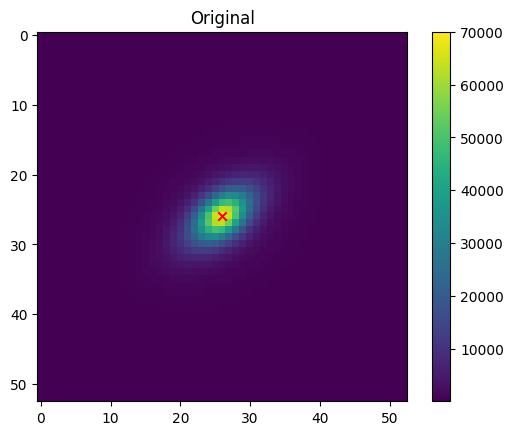

In [ ]:
plt.imshow(ptile_centered)
plt.colorbar()
plt.scatter(26, 26, color='r', marker='x')
plt.title("Original")

Text(0.5, 1.0, 'bilinear interpolation')

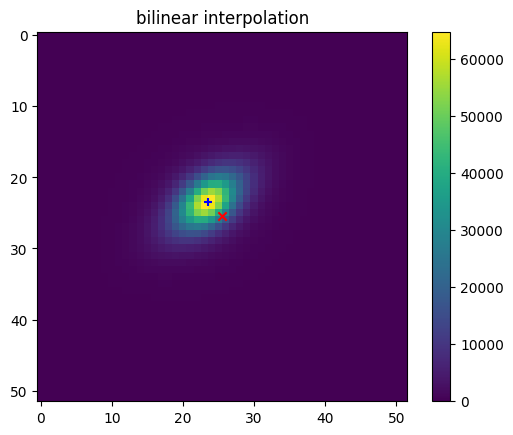

In [ ]:
plt.imshow(ptile_bi)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.scatter(23.5, 23.5, color='b', marker='+')
plt.title("bilinear interpolation")

Text(0.5, 1.0, 'redrawn')

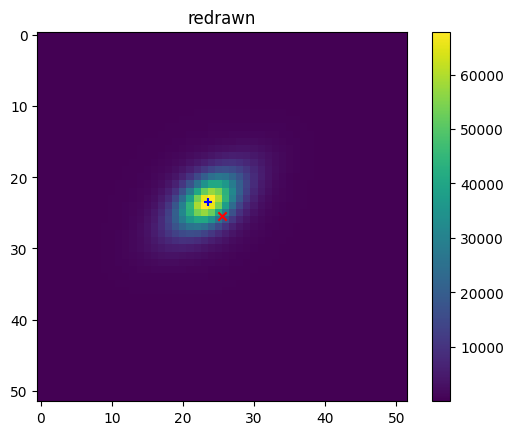

In [ ]:
ptile_redrawn = render_one_galaxy(gparams[1], psf, 52, offset=torch.tensor([-2., -2.]))[0]
plt.imshow(ptile_redrawn)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.scatter(23.5, 23.5, color='b', marker='+')
plt.title('redrawn')


In [ ]:
import galsim
img = galsim.Image(ptile_centered.numpy(), scale=0.2)
ii = galsim.InterpolatedImage(img, scale=0.2)
ptile_interpolated = ii.drawImage(nx=52, ny=52, scale=0.2, offset=(-2,-2), method="no_pixel").array


Text(0.5, 1.0, 'Galsim interpolated')

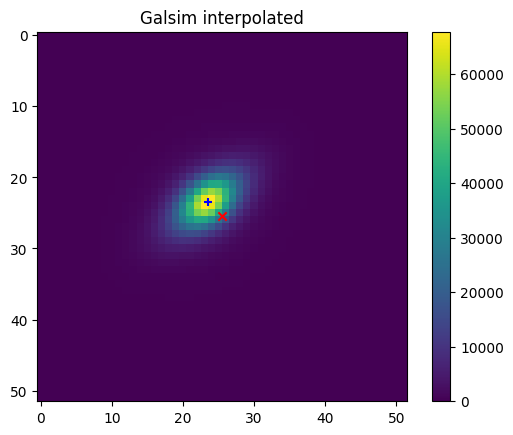

In [ ]:
plt.imshow(ptile_interpolated)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.scatter(23.5, 23.5, color='b', marker='+')
plt.title("Galsim interpolated")

Text(0.5, 1.0, 'Galsim interpolated - Redrawn')

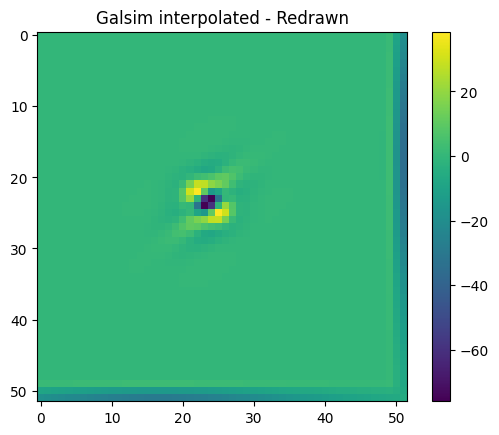

In [ ]:
plt.imshow(ptile_interpolated - ptile_redrawn.numpy())
plt.colorbar()
plt.title("Galsim interpolated - Redrawn")

Text(0.5, 1.0, 'Bilinear interpolation - Redrawn')

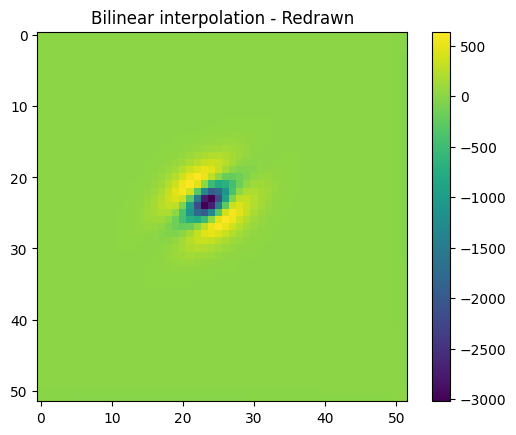

In [ ]:
plt.imshow(ptile_bi - ptile_redrawn)
plt.colorbar()
plt.title("Bilinear interpolation - Redrawn")

# Test an exponential

In [ ]:
def draw_exponential(slen:int, offset):
    g =galsim.Exponential(flux=1.0, half_light_radius=0.8)
    g = g.shear(g1=0.2, g2=0.2)
    psf = galsim.Gaussian(flux=1.0, fwhm=0.7)
    gc = galsim.Convolution([g, psf])
    return gc.drawImage(nx=slen, ny=slen, offset=offset, scale=0.2).array

In [ ]:
ptile_og = draw_exponential(53, offset=(0,0))

Text(0.5, 1.0, 'OG')

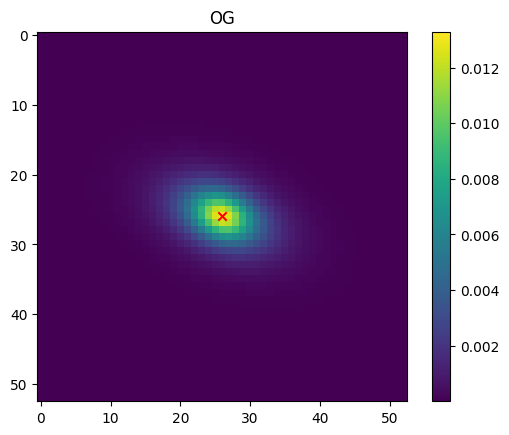

In [ ]:
plt.imshow(ptile_og)
plt.colorbar()
plt.scatter(26, 26, marker='x', color='r')
plt.title("OG")

In [ ]:
# shift biliner
input_ptiles = torch.from_numpy(ptile_og.reshape(1, 1, -1, 53))
locs = torch.zeros((1, 2)) + 0
out_ptiles = shift_sources_bilinear(input_ptiles, locs, 4, 52, center=False)
ptile_bi = out_ptiles[0, 0]
ptile_bi.shape

torch.Size([52, 52])

Text(0.5, 1.0, 'bilinear interpolation')

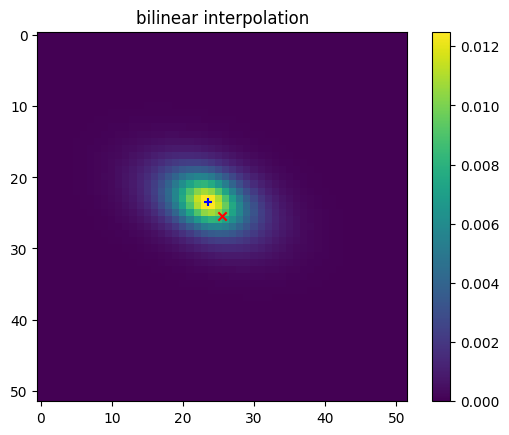

In [ ]:
plt.imshow(ptile_bi)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.scatter(23.5, 23.5, color='b', marker='+')
plt.title("bilinear interpolation")

Text(0.5, 1.0, 'redrawn')

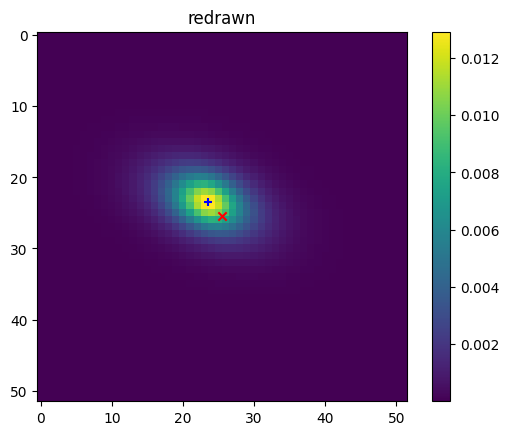

In [ ]:
ptile_redrawn = draw_exponential(slen=52, offset=(-2, -2))
plt.imshow(ptile_redrawn)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.scatter(23.5, 23.5, color='b', marker='+')
plt.title('redrawn')


In [ ]:
img = galsim.Image(ptile_og, scale=0.2)
ii = galsim.InterpolatedImage(img, scale=0.2)
ptile_interpolated = ii.drawImage(nx=52, ny=52, scale=0.2, offset=(-2,-2), method="no_pixel").array


Text(0.5, 1.0, 'Galsim interpolated')

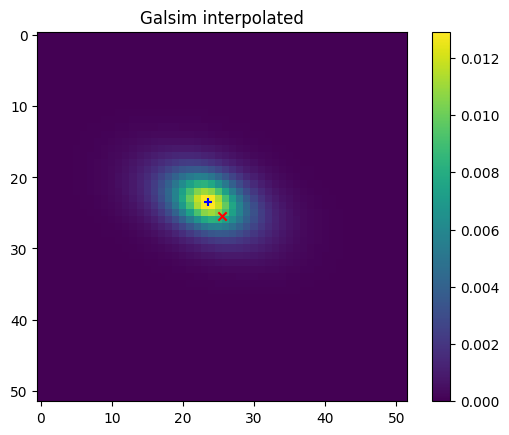

In [ ]:
plt.imshow(ptile_interpolated)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.scatter(23.5, 23.5, color='b', marker='+')
plt.title("Galsim interpolated")

Text(0.5, 1.0, 'Galsim interpolated - Redrawn')

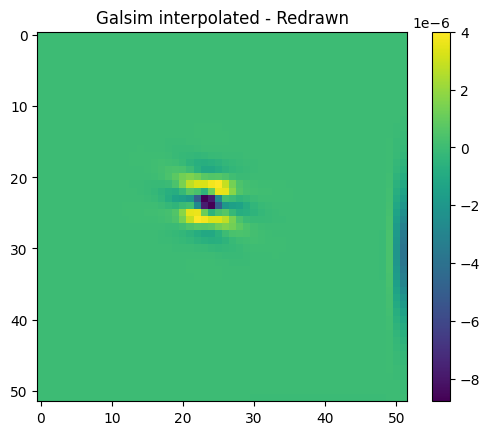

In [ ]:
plt.imshow(ptile_interpolated - ptile_redrawn)
plt.colorbar()
plt.title("Galsim interpolated - Redrawn")

In [ ]:
ptile_bi

tensor([[2.1138e-07, 2.3550e-07, 2.5977e-07,  ..., 4.5091e-10, 1.9253e-10,
         0.0000e+00],
        [3.1243e-07, 3.5160e-07, 3.9175e-07,  ..., 7.2719e-10, 3.1027e-10,
         0.0000e+00],
        [4.5653e-07, 5.1929e-07, 5.8474e-07,  ..., 1.1776e-09, 5.0243e-10,
         0.0000e+00],
        ...,
        [3.1258e-10, 4.0979e-10, 5.3470e-10,  ..., 7.6361e-08, 3.6034e-08,
         0.0000e+00],
        [1.2106e-10, 1.5808e-10, 2.0515e-10,  ..., 3.0682e-08, 1.4520e-08,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

Text(0.5, 1.0, 'Bilinear interpolation - Redrawn')

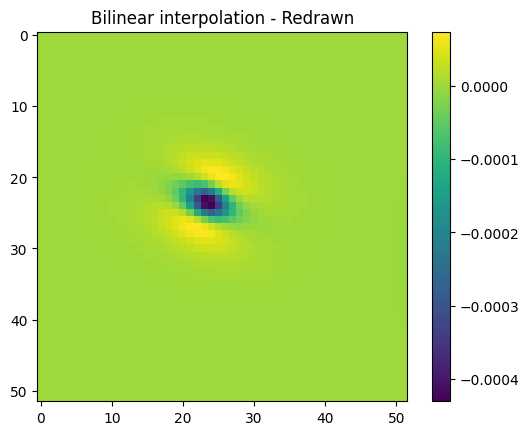

In [ ]:
plt.imshow(ptile_bi.numpy() - ptile_redrawn)
plt.colorbar()
plt.title("Bilinear interpolation - Redrawn")

## No offset, just interpolation

In [ ]:
def draw_exponential(slen:int, offset):
    g =galsim.Exponential(flux=1.0, half_light_radius=0.8)
    g = g.shear(g1=0.2, g2=0.2)
    psf = galsim.Gaussian(flux=1.0, fwhm=0.7)
    gc = galsim.Convolution([g, psf])
    return gc.drawImage(nx=slen, ny=slen, offset=offset, scale=0.2).array

In [ ]:
ptile_og = draw_exponential(53, offset=(0,0))

Text(0.5, 1.0, 'OG')

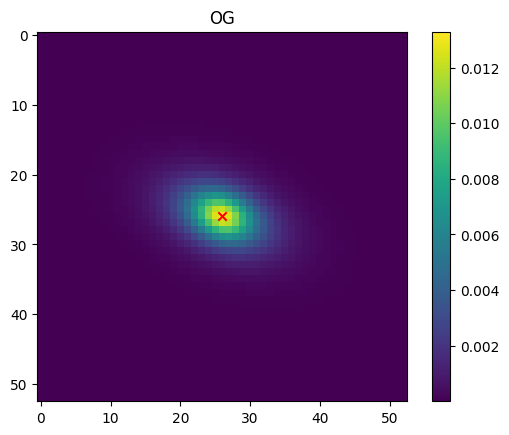

In [ ]:
plt.imshow(ptile_og)
plt.colorbar()
plt.scatter(26, 26, marker='x', color='r')
plt.title("OG")

In [ ]:
# shift biliner
input_ptiles = torch.from_numpy(ptile_og.reshape(1, 1, -1, 53))
locs = torch.zeros((1, 2)) + 0.5
out_ptiles = shift_sources_bilinear(input_ptiles, locs, 4, 52, center=False)
ptile_bi = out_ptiles[0, 0]
ptile_bi.shape

torch.Size([52, 52])

Text(0.5, 1.0, 'bilinear interpolation')

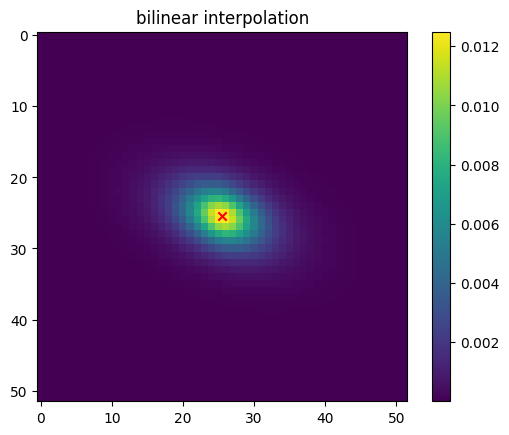

In [ ]:
plt.imshow(ptile_bi)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.title("bilinear interpolation")

In [ ]:
img = galsim.Image(ptile_og, scale=0.2)
ii = galsim.InterpolatedImage(img, scale=0.2)
ptile_interpolated = ii.drawImage(nx=52, ny=52, scale=0.2, offset=(0, 0), method="no_pixel").array


Text(0.5, 1.0, 'Galsim interpolated')

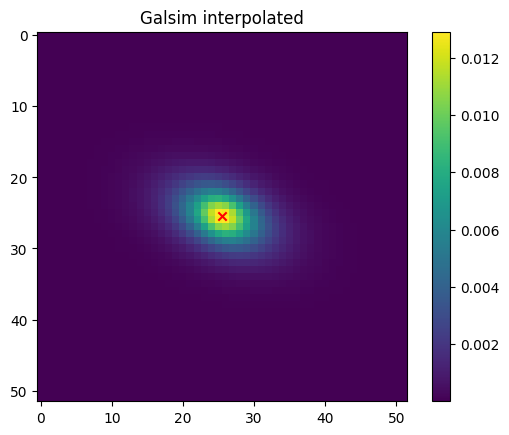

In [ ]:
plt.imshow(ptile_interpolated)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.title("Galsim interpolated")

Text(0.5, 1.0, 'redrawn')

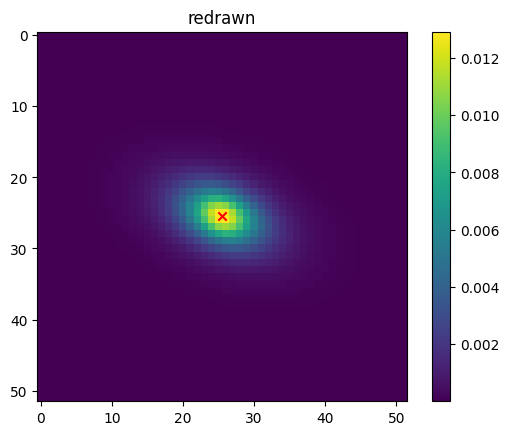

In [ ]:
ptile_redrawn = draw_exponential(slen=52, offset=(0, 0))
plt.imshow(ptile_redrawn)
plt.colorbar()
plt.scatter(25.5, 25.5, color='r', marker='x')
plt.title('redrawn')


Text(0.5, 1.0, 'Galsim interpolated - OG')

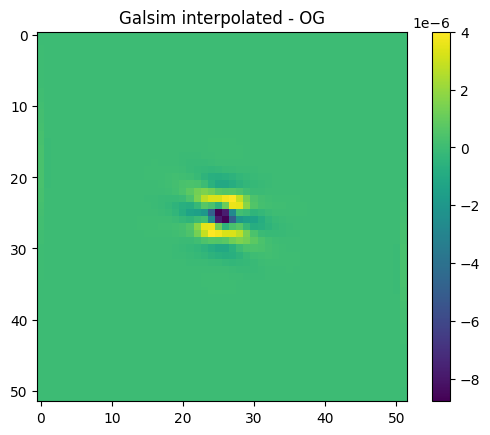

In [ ]:
plt.imshow(ptile_interpolated - ptile_redrawn)
plt.colorbar()
plt.title("Galsim interpolated - OG")

Text(0.5, 1.0, 'Bilinear interpolation - Redrawn')

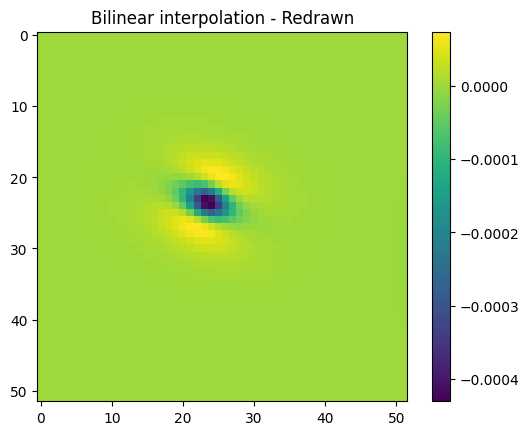

In [ ]:
plt.imshow(ptile_bi.numpy() - ptile_redrawn)
plt.colorbar()
plt.title("Bilinear interpolation - Redrawn")